In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
attacks = pd.read_csv('attacks.csv',engine='python')

In [3]:
attacks = attacks.dropna(axis=0)

In [5]:
a = []
for i in attacks['Case Number']:
    b=i.split('.')   

In [7]:
case_number_one = attacks['Case Number'].to_list()

In [9]:
case_number_two = attacks['Case Number'].to_list()

In [11]:
case_number_three = attacks['Case Number'].to_list()

In [12]:
regex = re.compile(r'\d{4}.\d{2}.\d{2}.[a-z]')

In [13]:
case_number1 = filter(regex.search,case_number_one)

In [14]:
a = list(case_number1) 

In [15]:
regex1 = re.compile(r'^\d{4}.\d{2}.\d{2}$')

In [16]:
case_number2 = filter(regex1.search,case_number_two)

In [17]:
b = list(case_number2)

In [18]:
regex2 = re.compile(r'^\d{4}.\d{2}.\d{2}.[A-Z]$')

In [19]:
case_number3 = filter(regex2.search,case_number_three)

In [20]:
c = list(case_number3)

In [21]:
regex3 = re.compile(r'^\d{4}.\d{2}.\d{2}')

In [22]:
full_list = a + b + c 

In [23]:
len(full_list)

1411

In [24]:
print(len(a))
print(len(b))
print(len(c))

384
1021
6


In [25]:
a = []
for i in full_list:
    a.append(i.split('.')[1])
    #print(i.split('.')[1])

In [26]:
full = pd.DataFrame({'col':full_list})
print(full)

               col
0     2016.08.29.b
1     2016.07.07.b
2     2016.06.21.b
3     2016.06.05.a
4     2016.05.29.a
...            ...
1406  2011.02.28.R
1407  2008.07.30.R
1408  2007.05.17.R
1409  1998.12.20.R
1410  1969.02.17.R

[1411 rows x 1 columns]


In [27]:
attacks = pd.merge(attacks,full,right_on='col',left_on='Case Number', how='inner')

In [29]:
a = []
for i in attacks['col']:
    a.append(i.split('.')[1])
    #print(i.split('.')[1])

In [30]:
attacks['Month'] = a

In [32]:
attacks['Month'].unique()

array(['09', '08', '07', '06', '05', '04', '01', '12', '11', '10',
       '07-10', '03', '02', '00'], dtype=object)

In [34]:
attacks = attacks.rename(columns={'Fatal (Y/N)': "Is_Fatal"})

In [35]:
attacks=attacks.replace({'07-10': '09'})

In [37]:
attacks['Month'].unique()

array(['09', '08', '07', '06', '05', '04', '01', '12', '11', '10', '03',
       '02', '00'], dtype=object)

In [38]:
attacks = attacks[attacks['Month']!='00']

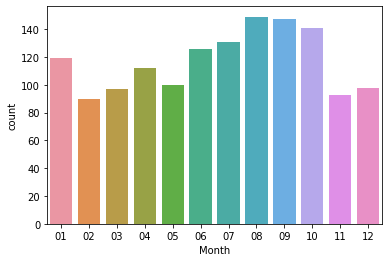

In [40]:
#Doing month wise analysis
sns.countplot(x='Month',data=attacks)

In [42]:
#Since seasons may vary for different countries lets filter first for attacks just in US
attacks_US = attacks[attacks['Country']=='USA']

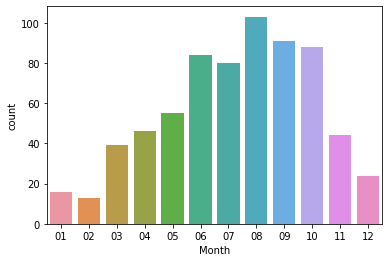

In [43]:
sns.countplot(x='Month',data=attacks_US)

# Clear that attacks happen in the height of summer in the US

In [45]:
# Now lets check for Australia
attacks_Aus = attacks[attacks['Country']=='AUSTRALIA']

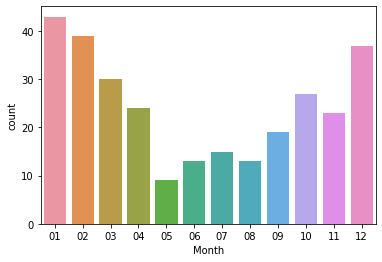

In [46]:
sns.countplot(x='Month',data=attacks_Aus)

# The case is same in Australia

In [47]:
Countries = attacks.groupby('Country').size()

In [48]:
Countries = Countries[Countries>10]

In [49]:
Countries = Countries.to_frame()
Countries 

,0
Country,
AUSTRALIA,292
BAHAMAS,24
BRAZIL,14
MEXICO,13
NEW ZEALAND,20
PAPUA NEW GUINEA,12
REUNION,15
SOUTH AFRICA,213
USA,683


In [50]:
Countries = Countries.rename(columns={0:'Count'})

In [51]:
attacks = pd.merge(attacks, Countries, on='Country')

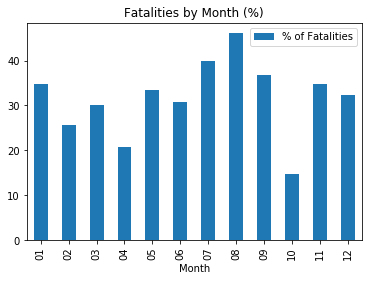

In [54]:
df_Month = pd.DataFrame(columns=["Month", "% of Fatalities"])
i=0
for month in list(attacks_Aus['Month'].unique()):
    ratio = attacks_Aus[(attacks_Aus['Month']==month)
                    &(attacks_Aus['Is_Fatal']=='Y')].shape[0] / attacks_Aus[attacks_Aus['Month']==month].shape[0]
    df_Month.loc[i] = (month, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_Months = df_Month.groupby(by="Month").sum()
df_Months.plot(kind='bar',title='Fatalities by Month (%)')

# Fatalities in August is very high in Australia

# US


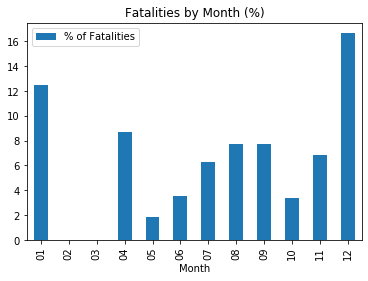

In [56]:
df_Month = pd.DataFrame(columns=["Month", "% of Fatalities"])
i=0
for month in list(attacks_US['Month'].unique()):
    ratio = attacks_US[(attacks_US['Month']==month)
                    &(attacks_US['Is_Fatal']=='Y')].shape[0] / attacks_US[attacks_US['Month']==month].shape[0]
    df_Month.loc[i] = (month, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_Months = df_Month.groupby(by="Month").sum()
df_Months.plot(kind='bar',title='Fatalities by Month (%)')